<a href="https://colab.research.google.com/github/tylee33/DLforFinance/blob/master/Stock_RiskAndReturn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Stock Investment Portfolio
###Risk and Return
https://www.investopedia.com/terms/r/riskreturntradeoff.asp

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [0]:
# input
symbols = ['AAPL', 'MSFT', 'AMD', 'INTC', 'NVDA']
start = '2016-01-01'
end = '2019-01-01'

In [3]:
df = pd.DataFrame()
data = []
for symbol in symbols:
    df = pd.merge(df, pd.DataFrame(yf.download(symbol, fields='price', 
                           start=start, end=end)['Adj Close']), 
                           right_index=True, left_index=True, how='outer')
       
    # Appends tickers which have data
    data.append(symbol)

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


In [4]:
df.columns = data
df = df.dropna(axis='columns')
df.head()

,AAPL,MSFT,AMD,INTC,NVDA
Date,,,,,
2016-01-04,98.446655,50.536495,2.77,30.453503,31.724598
2016-01-05,95.979675,50.767044,2.75,30.310141,32.234219
2016-01-06,94.101387,49.844841,2.51,29.638180,30.901340
2016-01-07,90.129868,48.111115,2.28,28.527191,29.676266
2016-01-08,90.606438,48.258663,2.14,28.231529,29.039225


In [5]:
df.describe()

,AAPL,MSFT,AMD,INTC,NVDA
count,754.000000,754.000000,754.000000,754.000000,754.000000
mean,142.971586,73.143130,11.618581,37.750018,144.111993
std,38.352112,20.555923,6.300744,7.769315,79.838453
min,85.395096,45.297375,1.800000,25.506376,24.717152
25%,105.359760,54.360601,6.852500,32.197761,65.410782
50%,146.849396,68.078163,11.585000,34.143524,146.004219
75%,169.800354,91.296390,13.820000,45.079753,220.506142
max,227.839798,113.435432,32.720001,55.007828,287.946198


**Calculate Stock Returns**

([<matplotlib.axis.YTick at 0x7fa2052038d0>,
 <a list of 5 Text yticklabel objects>)

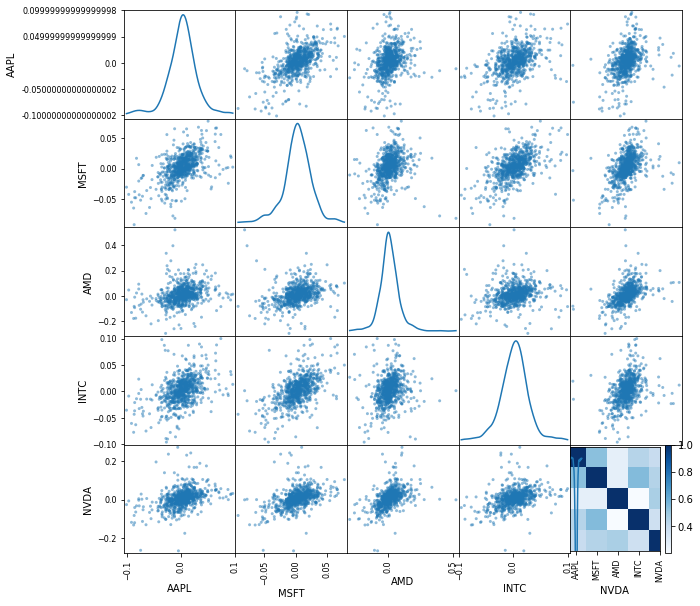

In [8]:
from pandas.plotting import scatter_matrix

rets = df.pct_change(periods=3)
scatter_matrix(rets, diagonal='kde', figsize=(10, 10))
corr = rets.corr()
plt.imshow(corr, cmap='Blues', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns)

Text(0, 0.5, 'Standard Deviations')

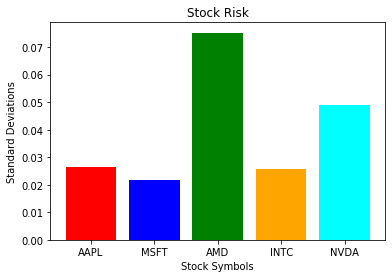

In [9]:
plt.bar(rets.columns, rets.std(), color=['red', 'blue', 'green', 'orange', 'cyan'])
plt.title("Stock Risk")
plt.xlabel("Stock Symbols")
plt.ylabel("Standard Deviations")

Text(0, 0.5, 'Returns')

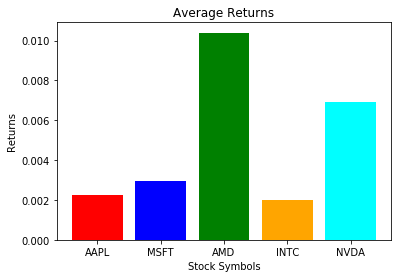

In [10]:
plt.bar(rets.columns, rets.mean(), color=['red', 'blue', 'green', 'orange', 'cyan'])
plt.title("Average Returns")
plt.xlabel("Stock Symbols")
plt.ylabel("Returns")

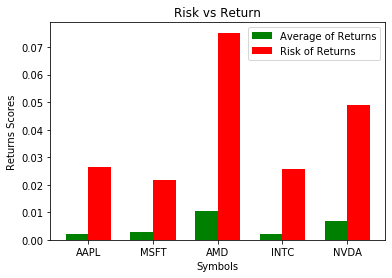

In [11]:
ind = np.arange(5)
width = 0.35       
plt.bar(ind, rets.mean(), width, color = 'g', label='Average of Returns')
plt.bar(ind + width, rets.std(), width, color = 'r', label='Risk of Returns')
plt.ylabel('Returns Scores')
plt.xlabel('Symbols')
plt.title('Risk vs Return')

plt.xticks(ind + width / 2, ('AAPL', 'MSFT', 'AMD', 'INTC', 'NVDA'))
plt.legend(loc='best')
plt.show()

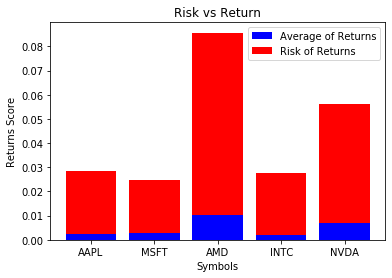

In [12]:
symbols = ['AAPL', 'MSFT', 'AMD', 'INTC', 'NVDA']
ind = [x for x, _ in enumerate(symbols)]

plt.bar(ind, rets.mean(), width=0.8, label='Average of Returns', color='b')
plt.bar(ind, rets.std(), width=0.8, label='Risk of Returns', color='r', bottom=rets.mean())

plt.xticks(ind, symbols)
plt.ylabel("Returns Score")
plt.xlabel("Symbols")
plt.legend(loc="upper right")
plt.title('Risk vs Return')
plt.show()

**Risk vs Expected Return**

Table: Risk vs Expected Returns


,Risk,Expected Returns
AAPL,0.026369,0.002242
MSFT,0.021786,0.002963
AMD,0.075234,0.010391
INTC,0.025785,0.001983
NVDA,0.049038,0.006929


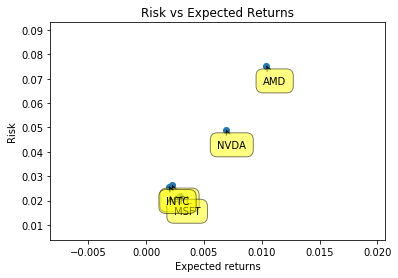

In [13]:
plt.scatter(rets.mean(), rets.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.title('Risk vs Expected Returns')
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.7', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
    
d = {'Risk':rets.std(), 'Expected Returns':rets.mean()}
print('Table: Risk vs Expected Returns')
tables = pd.DataFrame(data=d)
tables